# Abstract

This notebook explores the possibilities of using a filter method: first fiter out all the possibilies of the `weekly` labels, then identify the remaining types of repayment interval.  This method is proposed based on the observation of high accuracy in k-fold validation when there is no `weekly` data.  However, at the conclusion, it is at best that a single Decision Tree can outperforms all the other models and feature selection.  The raw standardized and dummified dataset is already the ceiling of prediction.  

# Initialization

In [150]:
# data visualization and utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import graphviz
%matplotlib inline

In [2]:
# classifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import Lasso

In [3]:
# evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV

In [96]:
# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [5]:
loan = pd.read_csv('kiva_loans.csv')

In [194]:
loan_encoded = pd.read_csv('kiva_loans_dummied.csv')

In [6]:
loan_std = pd.read_csv('kiva_loans_standardized.csv')

# Part I: Find a classifier to identify whether the data is a repayment intervel of weekly or not

## Sectino I: Only Dummified and Standardized dataset

**Set up dataset**

In [7]:
selected_features = list(loan_std.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_bullet')

In [8]:
y_weekly_std = loan_std['repayment_interval_weekly']
X = loan_std[selected_features]

**Model Selection**

In [30]:
dtree = DTC()

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_weekly_std.iloc[train_index], y_weekly_std.iloc[test_index]
    dtree.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(dtree.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670603
           1       0.72      0.71      0.71       602

   micro avg       1.00      1.00      1.00    671205
   macro avg       0.86      0.86      0.86    671205
weighted avg       1.00      1.00      1.00    671205

[[670433    170]
 [   174    428]]


In [32]:
forest = RandomForestClassifier(n_estimators=10, max_depth=3)

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_weekly_std.iloc[train_index], y_weekly_std.iloc[test_index]
    forest.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(forest.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670603
           1       0.00      0.00      0.00       602

   micro avg       1.00      1.00      1.00    671205
   macro avg       0.50      0.50      0.50    671205
weighted avg       1.00      1.00      1.00    671205

[[670603      0]
 [   602      0]]


In [31]:
lg = LogisticRegression()

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_weekly_std.iloc[train_index], y_weekly_std.iloc[test_index]
    lg.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(lg.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670603
           1       0.00      0.00      0.00       602

   micro avg       1.00      1.00      1.00    671205
   macro avg       0.50      0.50      0.50    671205
weighted avg       1.00      1.00      1.00    671205

[[670602      1]
 [   602      0]]


**Summary**

Since KNN and SVM suffer from the curse of dimentionality, it is nearly impossible to test them for 270+ columns/features.  Therefore, we conclude that only Decision Tree has a good prediction.  

## Section II: Test with LDA dataset

**Set up dataset**

In [33]:
lda = LDA()
X_lda = lda.fit_transform(X, y_weekly_std)

c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [35]:
X_lda = pd.DataFrame(X_lda)

**Model Selection**

In [36]:
dtree = DTC()

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):
    X_train, X_test = X_lda.iloc[train_index], X_lda.iloc[test_index]
    y_train, y_test = y_weekly_std.iloc[train_index], y_weekly_std.iloc[test_index]
    dtree.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(dtree.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670603
           1       0.36      0.33      0.35       602

   micro avg       1.00      1.00      1.00    671205
   macro avg       0.68      0.67      0.67    671205
weighted avg       1.00      1.00      1.00    671205

[[670254    349]
 [   402    200]]


In [38]:
forest = RandomForestClassifier(n_estimators=10, max_depth=3)

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):
    X_train, X_test = X_lda.iloc[train_index], X_lda.iloc[test_index]
    y_train, y_test = y_weekly_std.iloc[train_index], y_weekly_std.iloc[test_index]
    forest.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(forest.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670603
           1       0.11      0.00      0.00       602

   micro avg       1.00      1.00      1.00    671205
   macro avg       0.56      0.50      0.50    671205
weighted avg       1.00      1.00      1.00    671205

[[670595      8]
 [   601      1]]


In [37]:
lg = LogisticRegression()

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):
    X_train, X_test = X_lda.iloc[train_index], X_lda.iloc[test_index]
    y_train, y_test = y_weekly_std.iloc[train_index], y_weekly_std.iloc[test_index]
    lg.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(lg.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670603
           1       0.00      0.00      0.00       602

   micro avg       1.00      1.00      1.00    671205
   macro avg       0.50      0.50      0.50    671205
weighted avg       1.00      1.00      1.00    671205

[[670603      0]
 [   602      0]]


In [39]:
knn = KNN(n_neighbors=100)

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):
    X_train, X_test = X_lda.iloc[train_index], X_lda.iloc[test_index]
    y_train, y_test = y_weekly_std.iloc[train_index], y_weekly_std.iloc[test_index]
    knn.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(knn.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670603
           1       0.00      0.00      0.00       602

   micro avg       1.00      1.00      1.00    671205
   macro avg       0.50      0.50      0.50    671205
weighted avg       1.00      1.00      1.00    671205

[[670603      0]
 [   602      0]]


In [ ]:
svm = SVC(gamma='auto')

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):
    X_train, X_test = X_lda.iloc[train_index[0:2000]], X_lda.iloc[test_index[0:2000]]
    y_train, y_test = y_weekly_std.iloc[train_index[0:200]], y_weekly_std.iloc[test_index[0:200]]
    svm.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(svm.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

**Summary**

Decision Tree has the best predictions among all the models.  Only Decision Tree and Random Forest succeed to predict `weekly` data, while Decision Tree has better accuracy than Random Forest.  

## Conclusion

After compare the performance, it is better that Decision Tree first filter out the possible weekly cases without LDA feature extraction.  

# Part II: Find a classifier to identify whether the data is a repayment intervel of bullet, monthly or irregular.  

## Section I: Only Dummified and Standardized dataset

**Set up dataset**

In [9]:
# To verify the hypothesis

y_no_weekly = loan['repayment_interval']
y_no_weekly = y_no_weekly.loc[y_no_weekly != 'weekly']

X_no_weekly = loan_std.loc[loan_std['repayment_interval_weekly'] < 1]

selected_features = list(X_no_weekly.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_bullet')

X_no_weekly = X_no_weekly[selected_features]

**Model Selection**

In [22]:
# from experiment, 1 minutes for each iteration

dtree = DTC()

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_no_weekly):    
    print('happy')
    X_train, X_test = X_no_weekly.iloc[train_index], X_no_weekly.iloc[test_index]
    y_train, y_test = y_no_weekly.iloc[train_index], y_no_weekly.iloc[test_index]
    dtree.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(dtree.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
              precision    recall  f1-score   support

      bullet       0.84      0.85      0.85     70728
   irregular       0.89      0.91      0.90    257158
     monthly       0.92      0.90      0.91    342717

   micro avg       0.90      0.90      0.90    670603
   macro avg       0.88      0.89      0.89    670603
weighted avg       0.90      0.90      0.90    670603

[[ 59990   2607   8131]
 [  2463 235058  19637]
 [  8798  25025 308894]]


In [24]:
forest = RandomForestClassifier(n_estimators=10, max_depth=3)

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X_no_weekly):        
    X_train, X_test = X_no_weekly.iloc[train_index], X_no_weekly.iloc[test_index]
    y_train, y_test = y_no_weekly.iloc[train_index], y_no_weekly.iloc[test_index]
    forest.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(forest.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
    
    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1
    
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       1.00      0.00      0.00     70728
   irregular       0.87      0.60      0.71    257158
     monthly       0.65      0.94      0.77    342717

   micro avg       0.71      0.71      0.71    670603
   macro avg       0.84      0.51      0.49    670603
weighted avg       0.77      0.71      0.67    670603

[[    99   2721  67908]
 [     0 153807 103351]
 [     0  20476 322241]]


In [10]:
# from experiment, 1 minutes for each iteration

lg = LogisticRegression(multi_class='ovr', solver='lbfgs')

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X_no_weekly):
    
    X_train, X_test = X_no_weekly.iloc[train_index], X_no_weekly.iloc[test_index]
    y_train, y_test = y_no_weekly.iloc[train_index], y_no_weekly.iloc[test_index]
    lg.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(lg.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
    
    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1

print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Finish Test Iteration  0


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Finish Test Iteration  1


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Finish Test Iteration  2


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Finish Test Iteration  3


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Finish Test Iteration  4


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Finish Test Iteration  5


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Finish Test Iteration  6


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Finish Test Iteration  7


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Finish Test Iteration  8


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.75      0.70      0.72     70728
   irregular       0.85      0.77      0.81    257158
     monthly       0.80      0.87      0.83    342717

   micro avg       0.81      0.81      0.81    670603
   macro avg       0.80      0.78      0.79    670603
weighted avg       0.82      0.81      0.81    670603

[[ 49254   3847  17627]
 [  2685 197631  56842]
 [ 13405  30518 298794]]


**summary**

Given the 270+ features / columns, only Logistic Regression, Random Forest and Decision Tree can be tested.  Decision Tree has the best prediction.  

## Part II: LDA extraction

**LDA Extraction**

In [11]:
lda = LDA()
X_lda_no_weekly = lda.fit_transform(X_no_weekly, y_no_weekly)
X_lda_no_weekly = pd.DataFrame(X_lda_no_weekly)

c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


**Model Selection**

In [13]:
# from experiment, 4 seconds for each iteration

dtree = DTC()

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X_lda_no_weekly):    
    
    X_train, X_test = X_lda_no_weekly.iloc[train_index], X_lda_no_weekly.iloc[test_index]
    y_train, y_test = y_no_weekly.iloc[train_index], y_no_weekly.iloc[test_index]
    dtree.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(dtree.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
    
    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1
    
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.72      0.73      0.72     70728
   irregular       0.80      0.82      0.81    257158
     monthly       0.83      0.82      0.83    342717

   micro avg       0.81      0.81      0.81    670603
   macro avg       0.79      0.79      0.79    670603
weighted avg       0.81      0.81      0.81    670603

[[ 51516   4386  14826]
 [  4277 211623  41258]
 [ 15621  46981 280115]]


In [16]:
# from experiment, 10 seconds for each iteration

forest = RandomForestClassifier(n_estimators=20, max_depth=3)

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X_lda_no_weekly):    
    
    X_train, X_test = X_lda_no_weekly.iloc[train_index], X_lda_no_weekly.iloc[test_index]
    y_train, y_test = y_no_weekly.iloc[train_index], y_no_weekly.iloc[test_index]
    forest.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(forest.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
    
    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1
    
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.70      0.71      0.70     70728
   irregular       0.85      0.79      0.82    257158
     monthly       0.81      0.85      0.83    342717

   micro avg       0.81      0.81      0.81    670603
   macro avg       0.79      0.78      0.78    670603
weighted avg       0.81      0.81      0.81    670603

[[ 50245   3710  16773]
 [  2869 202248  52041]
 [ 18804  32203 291710]]


In [18]:
# from experiment, 5 seconds for each iteration
knn = KNN(n_neighbors=30)

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X_lda_no_weekly):    
    
    X_train, X_test = X_lda_no_weekly.iloc[train_index], X_lda_no_weekly.iloc[test_index]
    y_train, y_test = y_no_weekly.iloc[train_index], y_no_weekly.iloc[test_index]
    knn.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(knn.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
    
    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1
    
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.76      0.81      0.79     70728
   irregular       0.85      0.84      0.85    257158
     monthly       0.86      0.85      0.86    342717

   micro avg       0.84      0.84      0.84    670603
   macro avg       0.82      0.84      0.83    670603
weighted avg       0.84      0.84      0.84    670603

[[ 57608   2376  10744]
 [  3893 217200  36065]
 [ 14388  37343 290986]]


In [25]:
# from experiment, 5 seconds for each iteration
svm = SVC(gamma='auto')

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X_lda_no_weekly):    
    
    X_train, X_test = X_lda_no_weekly.iloc[train_index[0:20000]], X_lda_no_weekly.iloc[test_index[0:2000]]
    y_train, y_test = y_no_weekly.iloc[train_index[0:20000]], y_no_weekly.iloc[test_index[0:2000]]
    svm.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(svm.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
    
    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1
    
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.66      0.31      0.43      2191
   irregular       0.82      0.82      0.82      7860
     monthly       0.76      0.85      0.80      9949

   micro avg       0.78      0.78      0.78     20000
   macro avg       0.75      0.66      0.68     20000
weighted avg       0.78      0.78      0.77     20000

[[ 687  145 1359]
 [ 117 6452 1291]
 [ 230 1240 8479]]


In [14]:
# from experiment, 7 seconds for each iteration

lg = LogisticRegression(multi_class='ovr', solver='lbfgs')

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X_lda_no_weekly):    
    
    X_train, X_test = X_lda_no_weekly.iloc[train_index], X_lda_no_weekly.iloc[test_index]
    y_train, y_test = y_no_weekly.iloc[train_index], y_no_weekly.iloc[test_index]
    lg.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(lg.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
    
    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1
    
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.73      0.64      0.68     70728
   irregular       0.86      0.76      0.81    257158
     monthly       0.79      0.87      0.83    342717

   micro avg       0.81      0.81      0.81    670603
   macro avg       0.79      0.76      0.77    670603
weighted avg       0.81      0.81      0.80    670603

[[ 45173   4128  21427]
 [  1652 195967  59539]
 [ 14898  28226 299593]]


**Summary**

Decision Tree performs the best.  Although SVM has its potential, it reaches its limit when the rate of increase of trainig data cannot catch up with the performance.  

## Conclusion

Decision Tree, again, is chosen for the model of prediction.  More importantly, it is better not to have LDA feature extraction.  Other extraction methods may be used, for example, best subset or Lasso.   

# Part III: Combined Prediction

This is the last step of the prediction.  The prediction is divided into two steps: 

1. A decision tree specialized in identifying `weekly` repayment interval; if not, proceed to step 2.  
2. Another decision tree identify whether the loan application is `bullet`, `monthly` or `irregular`.  

Before ending the development of prediction, same test is run for a single decision tree to compare the performance.  Decision is chosen because it has the best classification among all the models.  

**Prepare for dataset**

In [14]:
y = loan['repayment_interval']

In [15]:
selected_features = list(loan_std.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_bullet')

In [16]:
X = loan_std[selected_features]

**Model Testing**

In [90]:
# from experiment, 7 seconds for each iteration

dtree1 = DTC()
dtree2 = DTC()

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X):    
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    selected_columns = list(X.columns)
    selected_columns.remove('repayment_interval_weekly')
    
    # make a dataset only contains `weekly` and `non-weekly` label
    dataset_weekly_train, dataset_weekly_test = X_train[selected_columns], X_test[selected_columns]
    label_weekly_train, label_weekly_test = X_train['repayment_interval_weekly'], X_test['repayment_interval_weekly']
    
    # make a dataset without `weekly` data and label
    dataset_no_weekly_train, dataset_no_weekly_test = X_train.loc[X_train['repayment_interval_weekly'] < 1], X_test.loc[X_test['repayment_interval_weekly'] < 1]
    dataset_no_weekly_train, dataset_no_weekly_test = dataset_no_weekly_train[selected_columns], dataset_no_weekly_test[selected_columns]
    label_no_weekly_train, label_no_weekly_test = y_train.loc[y_train != 'weekly'], y_test.loc[y_test != 'weekly']
        
    # train a dtree for recognizing `weekly` or not
    dtree1.fit(dataset_weekly_train,label_weekly_train)
        
    # train a dtree for recognizing `irregular`,`monthly` and `bullet`        
    dtree2.fit(dataset_no_weekly_train,label_no_weekly_train)
    
    # start prediction
    y_pred_1 = dtree1.predict(dataset_weekly_test)  
    y_pred_2 = dtree2.predict(dataset_weekly_test)
    
    print(sum(y_pred_1))
    
    # Merge Prediction Result
    y_pred = []
    for j in range(len(test_index)):
        if y_pred_1[j]:
            y_pred.append('weekly')
        else:
            y_pred.append(y_pred_2[j])

    ALL_PRED_LABEL.extend(y_pred)
    ALL_TRUE_LABEL.extend(y_test)
    
    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1
#     break
    
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

77
Finish Test Iteration  0
135
Finish Test Iteration  1
148
Finish Test Iteration  2
199
Finish Test Iteration  3
34
Finish Test Iteration  4
4
Finish Test Iteration  5
2
Finish Test Iteration  6
1
Finish Test Iteration  7
1
Finish Test Iteration  8
0
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.84      0.85      0.84     70728
   irregular       0.89      0.91      0.90    257158
     monthly       0.92      0.90      0.91    342717
      weekly       0.71      0.70      0.70       602

   micro avg       0.90      0.90      0.90    671205
   macro avg       0.84      0.84      0.84    671205
weighted avg       0.90      0.90      0.90    671205

[[ 59976   2585   8156     11]
 [  2475 234928  19617    138]
 [  8811  24925 308953     28]
 [     5    147     26    424]]


**Best Subset Selection**

In [111]:
from sklearn.metrics import precision_score

In [124]:
score = []
j = 1
for j in range(1,11):
    
    X_subset = SelectKBest(f_classif, k=j*27).fit_transform(X, y)
    X_subset = pd.DataFrame(X_subset)
    
    dtree = DTC()

    ALL_TRUE_LABEL = []
    ALL_PRED_LABEL = []
    kf = KFold(n_splits=10)
    i = 0

    for train_index, test_index in kf.split(X_subset):    

        X_train, X_test = X_subset.iloc[train_index], X_subset.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtree.fit(X_train,y_train)
        ALL_PRED_LABEL.extend(dtree.predict(X_test))
        ALL_TRUE_LABEL.extend(y_test)

        # Screen Output for tracking the progress, sometimes I wait too long......
        print('Finish Test Iteration ',i)
        i += 1
    score.append(precision_score(ALL_TRUE_LABEL, ALL_PRED_LABEL, average = 'macro'))
    print('Finish Subset Iteration ',j)
#     print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
#     print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  1
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  2
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
Finish Subset Iteration  3
Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iterati

In [130]:
k_subset = [i * 27 for i in range(1,11)]
k_subset

[27, 54, 81, 108, 135, 162, 189, 216, 243, 270]

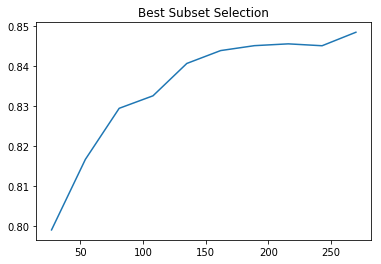

In [144]:
plt.plot(k_subset, score)
# plt.xlabel('Precision(macro)')
# plt.ylabel('Number of Selected Columns')
plt.title('Best Subset Selection')
plt.show()

Thus, it is better to use all features.  

**Single Model Prediction (Decision Tree)**

In [146]:
y = loan['repayment_interval']

In [147]:
selected_features = list(loan_std.columns)
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_bullet')

In [148]:
X = loan_std[selected_features]

In [149]:
dtree = DTC()

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
i = 0

for train_index, test_index in kf.split(X):    
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    dtree.fit(X_train,y_train)
    ALL_PRED_LABEL.extend(dtree.predict(X_test))
    ALL_TRUE_LABEL.extend(y_test)
    
    # Screen Output for tracking the progress, sometimes I wait too long......
    print('Finish Test Iteration ',i)
    i += 1
    
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

Finish Test Iteration  0
Finish Test Iteration  1
Finish Test Iteration  2
Finish Test Iteration  3
Finish Test Iteration  4
Finish Test Iteration  5
Finish Test Iteration  6
Finish Test Iteration  7
Finish Test Iteration  8
Finish Test Iteration  9
              precision    recall  f1-score   support

      bullet       0.84      0.85      0.85     70728
   irregular       0.89      0.91      0.90    257158
     monthly       0.92      0.90      0.91    342717
      weekly       0.73      0.70      0.72       602

   micro avg       0.90      0.90      0.90    671205
   macro avg       0.85      0.84      0.84    671205
weighted avg       0.90      0.90      0.90    671205

[[ 59982   2620   8113     13]
 [  2450 234882  19712    114]
 [  8802  24944 308942     29]
 [     3    147     29    423]]


The single model selection is even better.  

# Interpretation

Data visualization is as important as accurate prediction.  Below we try to visualize the Decision Tree of single model.  

In [154]:
dtree = DTC()    
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [171]:
from graphviz import Source
from sklearn import tree

In [176]:
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
dotfile.close()

However, the data are in normal distribution.  It is difficult to read, as data like `term_in_months` are transformed to float, e.g. 1.123.  In order to have better visualization, another decision tree is trained for this purpose.  

In [196]:
selected_features = list(loan_encoded.columns)
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_bullet')
X_encoded = loan_encoded[selected_features]
y = loan['repayment_interval']

In [198]:
dtree = DTC()    
dtree.fit(X_encoded,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [199]:
dotfile2 = open("dtree2.dot", 'w')
tree.export_graphviz(dtree, out_file = dotfile2, feature_names = X.columns)
dotfile2.close()

As the result is too large, only the first 1000 nodes are explored from 107922 nodes.  

The value in each nodes are refers to the outcomes / possible labels.  They are in order of bullet, irregular, monthly, weekly, same as the order in classification report.  As one traverses down the tree, fewer cases in the result arary are observed, which means the possibility narrows down.  The Left arrow is True, while Right arrow is False.  Each split is binary (either True or False).  

From the result, we can see there are several improtant split: 

- terms in months < 2.5: (split A)

No `monthly` outcome.  

- country_code_KE < 0.5 (i.e. not KE): (if split A is True)

No `weekly` outcome.  

- count_female < 0.5 (i.e. no female borrower): (if split A is False) (split B)

No `weekly` outcome.  

- country_SV < 0.5 (i.e. not SV): (if split A is False and split B is False)

No `monthly` outcome.  

# Conclusion

The first few splits are related to `country_code`, `terms_in_months` and `sector_Agriculture`.  This shows that the location, the industry and the length of repayment much affects the repayment interval.  It is also clear that the data is highly specific, all feature extraction fails to give higher performance to the prediction.  